# 추가된 패키지
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [116]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import r2_score# 선형 모델(Linear Models)
from sklearn.datasets import load_boston, load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

# [설명]선형 모델(Linear Models)

* 선형 모델은 과거 부터 지금 까지 널리 사용되고 연구 되고 있는 기계학습 방법
* 선형 모델은 입력 데이터에 대한 선형 함수를 만들어 예측 수행

* 회귀 분석을 위한 선형 모델은 다음과 같이 정의
\begin{equation}
\hat{y}(w,x) = b + w x
\end{equation}
\begin{equation}
\hat{y}(w,x) = b + w_1 x_1 + ... + w_p x_p
\end{equation}

  + $x$: 입력 데이터
  + $w$: 모델이 학습할 파라미터
  + $b$: 편향
  + $w_1$~$w_p$: 가중치


## [설명]선형 회귀(Linear Regression)

* **선형 회귀(Linear Regression)**또는 **최소제곱법(Ordinary Least Squares)**은 가장 간단한 회귀 분석을 위한 선형 모델
* 선형 회귀는 모델의 예측과 정답 사이의 **평균제곱오차(Mean Squared Error)**를 최소화 하는 학습 파라미터 $w$를 찾음
* 평균제곱오차는 아래와 같이 정의

\begin{equation}
MSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2
\end{equation}

  + $y$: 정답
  + $\hat{y}$: 예측 값을 의미

* 선형 회귀 모델에서 사용하는 다양한 오류 측정 방법
  + MAE(Mean Absoulte Error)
  + MAPE(Mean Absolute Percentage Error)
  + MSE(Mean Squared Error)
  + MPE(Mean Percentage Error)


## data-01.csv데이터 읽어오기

In [2]:
# header='infer' 첫번째 열은 
df = pd.read_csv( 'data/data-01.csv', header=None)
df.columns = ['q1','q2','midterm','final']
df

,q1,q2,midterm,final
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


## 특성 데이터
* iloc[:,:] 활용

In [3]:
x_data = df[['q1','q2','midterm']] # x_data = df.iloc[:, :-1]
x_data # 특성데이터

,q1,q2,midterm
0,73,80,75
1,93,88,93
2,89,91,90
3,96,98,100
4,73,66,70
5,53,46,55
6,69,74,77
7,47,56,60
8,87,79,90
9,79,70,88


## 라벨(final)

In [4]:
y_data = df[['final']] # y_data = df.iloc[:,[-1]]
y_data # 라벨

,final
0,152
1,185
2,180
3,196
4,142
5,101
6,149
7,115
8,175
9,164


## 데이터 모델 핏

In [5]:
model_lr = LinearRegression()
model_lr.fit(x_data, y_data)

LinearRegression()

In [6]:
model_lr.coef_ # weight

array([[0.35593822, 0.54251876, 1.16744422]])

In [7]:
model_lr.intercept_ # bias

array([-4.3361024])

In [8]:
# q1:70, q2:75, midterm:75 최종 점수 예측값
70*0.35593822 + 75*0.54251876 + 75*1.16744422 + (-4.3361024)

148.8267965

## 예측값 구하기

In [9]:
model_lr.predict([[70,75,75],[60,45,50]]) # 2x3 3x1(=w) np.matmul 2x1

array([[148.82679595],
       [ 99.80574563]])

In [10]:
# matmul예시 # metrics multimat?
a = np.array( [[1,2],[3,4]])
b = np.array( [[5,6],[7,8]])
np.matmul(a,b)

array([[19, 22],
       [43, 50]])

In [11]:
# 2x3 3x4 행렬곱 2x4
# 2x4 3x4 = error


In [12]:
x_data.shape

(25, 3)

## 결정계수 구하기

In [13]:
model_lr.score(x_data,y_data) # 25x3 3x1 => 25x1

0.98966157894484

In [14]:
p = model_lr.predict(x_data)
p.shape

(25, 1)

## 그래프 도식화하기

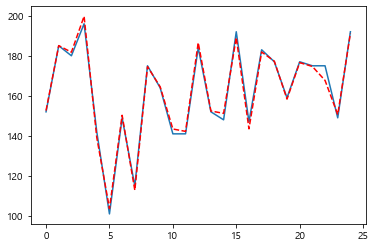

In [15]:
plt.plot(y_data,label='final 데이터')
plt.plot(p,'r--',label='예측 데이터')
plt.show() # 실측값, final 최종점수

# 다음 

## 데이터 가져오기 boston

In [16]:
boston = load_boston()
boston
# 딕셔너리 형식으로 되어있음.

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

## 딕셔너리 keys 확인

In [17]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

## 특성데이터

In [18]:
boston['data']
boston['data'].shape # 특성 데이터

(506, 13)

## 라벨

In [28]:
boston['target'] # label
boston['target'].shape

(506,)

## 칼럼명 확인(특성 데이터 이름)

In [20]:
boston['feature_names'] # 칼럼명, 특성데이터 이름

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

# [설명]보스턴 주택 가격 데이터

* 주택 가격 데이터는 도시에 대한 분석과 부동산, 경제적인 정보 분석 등 많은 활용 가능한 측면들이 존재
* 보스턴 주택 가격 데이터는 카네기 멜론 대학교에서 관리하는 StatLib 라이브러리에서 가져온 것
* 헤리슨(Harrison, D.)과 루빈펠트(Rubinfeld, D. L.)의 논문 "Hedonic prices and the demand for clean air', J. Environ. Economics & Management"에서 보스턴 데이터가 사용
* 1970년도 인구 조사에서 보스턴의 506개 조사 구역과 주택 가격에 영향을 주는 속성 21개로 구성

| 속성 | 설명 |
|------|------|
| CRIM | 자치시(town)별 1인당 범죄율 |
| ZN | 25,000 평방 피트가 넘는 거주지역 토지 비율 |
| INDUS | 자치시(town)별 비소매 상업지역 토지 비율 |
| CHAS | 찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0) |
| NOX | 10,000,000당  일산화질소 농도 |
| RM | 주택 1가구당 평균 방의 수 |
| AGE | 1940년 이전에 건축된 소유주택 비율 |
| DIS | 5개의 보스턴 고용 센터까지의 가중 거리 |
| RAD | 방사형 고속도로 접근성 지수 |
| TAX | 10,000 달러당 재산 세율 |
| PTRATIO | 자치시(town)별 학생/교사 비율 |
| B | 1000(Bk-0.63)^2, Bk: 자치시별 흑인 비율 |
| LSTAT | 모집단의 하위계층 비율(%) |
| MEDV | 소유자가 거주하는 주택가격(중앙값) (단위: 1,000 달러) |


* 보스톤 지역 각 타운의 중위가격(중앙값=대표값) (이상치가 많다면 많이 씀) 

# [문제] 주어진 값으로 주택가격 예측하기
* 1	0.02731	0.0	7.07	0.0	0.469	6.421	78.9	4.9671	2.0	242.0	17.8	396.90	9.14	21.6


## 딕셔너리를 데이터 프레임으로 만들기

In [33]:
#	0.02731	0.0	7.07	0.0	0.469	6.421	78.9	4.9671	2.0	242.0	17.8	396.90	9.14	21.6
# 주택가격을 예측하시오.

In [31]:
# 데이터 프레임으로 만들기
boston_df = pd.DataFrame(boston['data'], columns = boston['feature_names'])
boston_df['MEDV'] = boston['target'] # 이걸 어떻게 아는거야? 타겟이 중앙값이라는걸?
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## 특성데이터, 라벨, 데이터 선형회귀모델에 맞추기

In [32]:
x_data = boston_df.drop('MEDV', axis=1) # boston_df.iloc[:,:-1]
y_data = boston_df[['MEDV']] # boston_df.iloc[:,[-1]]

boston_lr = LinearRegression()
boston_lr.fit(x_data, y_data)


LinearRegression()

## 기울기

In [23]:
boston_lr.coef_ # 13x1

array([[-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
         2.68673382e+00, -1.77666112e+01,  3.80986521e+00,
         6.92224640e-04, -1.47556685e+00,  3.06049479e-01,
        -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]])

## 절편

In [24]:
boston_lr.intercept_

array([36.45948839])

## 값 예측 쌉가능, [[]] 두 번 씌우는 거 확인

In [25]:
# w개수x1 matmul 1x13 
boston_lr.predict([[0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.90, 9.14]])

array([[25.02556238]])

In [26]:
![3](/img/3.png)

'[3]'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


# [설명]train_set, test_set 분리하기

* 트레이닝 셋 분리 - 테스트셋 가지고 테스트 진행 
* 랜덤하게 70개 정도 뽑아서 트레이닝, 30개 ~~ 하는 경우도


* from sklearn.preprocessing import StandardScaler, MinMaxScaler # 왜 scaler해야할까
* from sklearn.model_selection import train_test_split 

* 특성데이터 단위 차이 많이남. 
* 오리지널 데이터를 nomarlized하는 방법 : minmaxscaling, standardization

## 결론 : 다중회귀에서는 scaling을 무조건 한다. 
* 단위가 특성 데이터마다 1, 10,100 제각각임. 단위를 일정히 맞춰준다.
* 학습할 때 infinite 발산 가능성, 최저점을 못찾아서.

## x_data의 numpy(ndarray) 데이터 가져오기 x_data.values

In [40]:
x_data.values # numpy(ndarray) 데이터 가져오기

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

## x데이터셋만들기 StandardScaler(), fit_transform(x_data.values)

In [49]:
scaleX = StandardScaler() # numpy( ndarray)  matrix #특성데이터 스케일링
x_dataS = scaleX.fit_transform( x_data.values ) # 평균이 0이고 편차가 1인 데이터 셋으로 나옴.

In [51]:
x_dataS

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

## y_data의 ndarray 가져오기 y_data.values

In [53]:
y_data.values

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

## 학습용데이터셋, 테스트용 데이터셋 나누기

In [52]:
# 학습용데이터셋, 테스트용 데이터셋 나누기
# random_state=1 강사님과 동일하게 주면 똑같이 추출됨.

In [56]:
result = train_test_split(x_dataS, y_data.values, test_size=0.2, random_state=1) # ndarray

In [ ]:
a,b,c = [1,2,3]

In [57]:
result # 안에 ndarray가 4개

[array([[-0.40405061, -0.48772236, -0.61672651, ..., -0.2568579 ,
          0.29270416, -0.95921806],
        [-0.40254357,  0.58526684, -0.87644514, ...,  0.57539459,
          0.37285362, -0.81203559],
        [ 1.53592609, -0.48772236,  1.01599907, ...,  0.80657583,
          0.44105193,  2.54512652],
        ...,
        [ 0.26283202, -0.48772236,  1.01599907, ...,  0.80657583,
          0.44105193,  0.94153844],
        [-0.38206188, -0.48772236, -0.72032214, ..., -0.48803915,
          0.22012011, -0.24853698],
        [-0.41119127, -0.48772236, -0.75534039, ...,  0.34421334,
          0.44105193, -0.54430367]]),
 array([[-0.41477789,  0.92862338, -1.30687771, ..., -0.02567665,
          0.44105193, -0.71811916],
        [-0.41755805,  1.87285388, -1.07342276, ..., -0.39556665,
          0.44105193, -0.76717998],
        [-0.39383653, -0.48772236, -0.61672651, ..., -0.2568579 ,
          0.3954402 ,  0.86163938],
        ...,
        [-0.40795725, -0.48772236, -0.37597609, ...,  

## 다시 언패킹

In [ ]:
# [np.array([...]),np.array([...]),np.array([...]),np.array([...])]
# unpacking해주면 됨.

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x_dataS, y_data.values,  test_size=0.2 ,  random_state=1 )


In [59]:
x_train

array([[-0.40405061, -0.48772236, -0.61672651, ..., -0.2568579 ,
         0.29270416, -0.95921806],
       [-0.40254357,  0.58526684, -0.87644514, ...,  0.57539459,
         0.37285362, -0.81203559],
       [ 1.53592609, -0.48772236,  1.01599907, ...,  0.80657583,
         0.44105193,  2.54512652],
       ...,
       [ 0.26283202, -0.48772236,  1.01599907, ...,  0.80657583,
         0.44105193,  0.94153844],
       [-0.38206188, -0.48772236, -0.72032214, ..., -0.48803915,
         0.22012011, -0.24853698],
       [-0.41119127, -0.48772236, -0.75534039, ...,  0.34421334,
         0.44105193, -0.54430367]])

In [60]:
x_train.shape

(404, 13)

In [61]:
x_test.shape

(102, 13)

In [62]:
y_train.shape

(404, 1)

In [63]:
y_test.shape

(102, 1)

## 모델 경사하강법에 데이터(x_train, y_train) 집어넣기

In [64]:
modelSGD = SGDRegressor(verbose=1)
modelSGD.fit(x_train, y_train)

-- Epoch 1
Norm: 4.12, NNZs: 13, Bias: 15.784048, T: 404, Avg. loss: 101.704238
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 4.53, NNZs: 13, Bias: 19.573145, T: 808, Avg. loss: 24.567548
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 5.05, NNZs: 13, Bias: 21.096313, T: 1212, Avg. loss: 14.862993
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 5.28, NNZs: 13, Bias: 21.795849, T: 1616, Avg. loss: 12.744843
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 5.52, NNZs: 13, Bias: 22.163378, T: 2020, Avg. loss: 12.010981
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 5.49, NNZs: 13, Bias: 22.362189, T: 2424, Avg. loss: 11.705690
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 5.69, NNZs: 13, Bias: 22.449271, T: 2828, Avg. loss: 11.674522
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 5.77, NNZs: 13, Bias: 22.550877, T: 3232, Avg. loss: 11.531895
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 5.85, NNZs: 13, Bias: 22.572368, T: 3636, Avg. loss: 11.531210
T

C:\Users\medici\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SGDRegressor(verbose=1)

## train_set 결정계수 구하기

In [70]:
modelSGD.score(x_train, y_train)

0.7278614089409634

## test_set 결정계수 구하기

In [71]:
modelSGD.score(x_test, y_test)

0.763668350948823

# [설명]train 점수, test 점수 
- 테스트 점수가 트레인 점수보다 현저히 낮게 되면 오버피팅(과적합)된 것.
- 테스트 점수가 트레인 점수보다 많이 높으면 학습이 더 되어야함.(과소적합)
- 고로 학습이 잘 됐다.

## 예측값 확인 modelSGD.predict

In [69]:
# 예측값 확인
modelSGD.predict(x_test[[0]])

array([31.86073026])

In [66]:
x_test[0] # 13 벡터니까 데이터셋(매트릭스)으로 predict해줘야함 matmul

array([-0.41477789,  0.92862338, -1.30687771, -0.27259857, -0.71434722,
        0.80402837,  0.0613455 , -0.29108882, -0.29308074, -1.10611514,
       -0.02567665,  0.44105193, -0.71811916])

In [67]:
y_test[0]

array([28.2])

## 원 데이터로 예측하기 predict

In [72]:
# 사실 원데이터를 예측해야함.
boston_lr.predict([[0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.90, 9.14]])
# 요 위에 대한 스케일링 값을 줘야함

array([[25.02556238]])

## scaling하기 transform

In [76]:
xd = scaleX.transform([[0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.90, 9.14]])
# 롸? 이건 리얼 뭐지 스케일링되지 않은 값으로 트랜스폼해줘야함.

## scaling한 값 예측하기 predict

In [77]:
modelSGD.predict(xd)

array([24.83176527])

In [78]:
# 붓꽃데이터
iris = load_iris()

In [79]:
iris # 딕셔너리

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [80]:
iris.keys() # 특성, 라벨, 

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [81]:
iris['data'] # 4개 칼럼

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [83]:
iris['target'] # 0,1,2 붓꽃의 종류, 품종, 분류쪽에 해당. 라벨로 쓰지 않을 것.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [84]:
iris['target_names'] # 

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [87]:
iris_df = pd.DataFrame(iris['data'],columns = iris['feature_names'])
iris_df['target'] = iris['target']
iris_df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# 팀 과제
sl(target), feature(sw,pl,pw)
문제 : sw:3.0, pl:1.4, pw:0.2 인 경우 sl를 예측하시오
1. scale (standardscaring)
2. train, test
3. train, test score
4. 예측

In [106]:
x_data = iris_df.iloc[:,1:-1].values
y_data = iris_df.iloc[:,0].values

scaler_x = StandardScaler()
scaler_x.fit(x_data)
x_dataS = scaler_x.transform(x_data)

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x_dataS, y_data,test_size=0.2, random_state=1)


In [ ]:
#scaling은 특성데이터만 해도됨. 라벨은 할 필요없음.

In [108]:
model_sgd = SGDRegressor()
model_sgd.fit(x_train, y_train)

SGDRegressor()

In [111]:
model_sgd.score(x_train, y_train)

0.8002045108397766

In [112]:
model_sgd.score(x_test, y_test)

0.8110211543783457

In [113]:
print('train 점수:', model_sgd.score(x_train, y_train))
print('test 점수:', model_sgd.score(x_test, y_test))

train 점수: 0.8002045108397766
test 점수: 0.8110211543783457


In [115]:
xd = scaler_x.transform([[3.0,1.4,0.2]]) # 한 번 더 스케일링
model_sgd.predict(xd) # 4.75로 계산됨

array([4.75831625])

## 근웅이형 답

In [ ]:
# 1. 데이터 ndarray로 가져오기
x_data, y_data = iris_df.iloc[:,1:-1].values, iris_df.iloc[:,0].values
# 2. 데이터 모델 핏하기, 스케일링하기
scaler_x = StandardScaler()
scaler_x.fit(x_data)
x_data_scale =  scaler_x.transform(x_data)
# 3. 언패킹
x_train, x_test, y_train, y_test = train_test_split(x_data_scale, y_data , test_size=0.2, random_state=1)
# 4. SGD model에 데이터 핏하기
model_sgd = SGDRegressor()
model_sgd.fit(x_train, y_train)
# 5. train_set, test_set 결정계수 구하기
print('train 점수:', model_sgd.score(x_train, y_train))
print('test 점수:', model_sgd.score(x_test, y_test))
# 6. 예측값 구하기
pred = model_sgd.predict([[3.0, 1.4, 0.2]])
print('예측값:', pred)

# [설명] StandardScaler, MinMaxScaler, RobustSccaler
StandardScaler

각 특성의 평균을 0, 분산을 1로 변경하여 모든 특성이 같은 크기를 가지게 한다.
특성의 최솟값과 최댓값 크기를 제한하지 않는다.
StandardScaler 공식 : (x-mean)/std
    

MinMaxScaler
모든 특성이 정확하게 0과 1 사이에 위치하도록 데이터를 변경한다.
MinMaxScaler 공식 : (x−x_min)/(x_max−x_min)

    
RobustScaler
특성들이 같은 스케일을 가지게 한다.
(이러한 특징은 통계적 측면에서는 StandardScaler와 유사하다.)
평균과 분산 대신 median과 quantile을 사용한다.
따라서, outlier의 영향을 받지 않는다.
RobustScaler 공식 : (x−q2)/(q3−q1)

* 중요한 것은 특정 분포에 있는 데이터를 같게 하는 것?
